# Phase plane portraits and analysis

## Four stationary points

Let's consider a following system of ODEs:

$$ \frac{dx(t)}{dt} = 15x^2 + 9y^2 - 15, \frac{dy(t)}{dt} = 16x^2 - 16y^2 $$

We find all stationary points.

In [22]:
from CommonFunctions import *
import sympy as sp
from matplotlib import pyplot as plt

In [23]:
t = sp.Symbol('t')
x = sp.Function('x')(t)
y = sp.Function('y')(t)

In [24]:
P_eq = sp.Eq(x.diff(t), 16 * x**2 + 9 * y**2 - 25)
P_eq

Eq(Derivative(x(t), t), 16*x(t)**2 + 9*y(t)**2 - 25)

In [25]:
Q_eq = sp.Eq(y.diff(t), 16 * x**2 - 16 * y**2)
Q_eq

Eq(Derivative(y(t), t), 16*x(t)**2 - 16*y(t)**2)

In [26]:
fixed_points = sp.solve([P_eq.rhs, Q_eq.rhs], [x, y])
fixed_points

[(-1, -1), (-1, 1), (1, -1), (1, 1)]

Now we find parameters a, b, c, d:

In [27]:
a, b, c, d = find_fixed_point_abcd(P_eq, Q_eq, x, y)
print(f'a = {a}\nb = {b}\nc = {c}\nd = {d}')

a = 32*x(t)
b = 18*y(t)
c = 32*x(t)
d = -32*y(t)


And now we calculate parameters $q, p, r$ for fixed point $(-1, 1)$:

In [28]:
fixed_point = fixed_points[1]
fixed_point

(-1, 1)

In [29]:
q, p, r = find_fixed_point_parameters(P_eq, Q_eq, x, y, fixed_point=fixed_point)
print(f'q = {q}\np = {p}\nr = {r}')

q = 1600.00000000000
p = 64.0000000000000
r = -2304.00000000000


And now we can classify it:

In [30]:
classify_fixed_point(q, p, r)

'stable focal'

Let's check all fixed points:

In [31]:
for point in fixed_points:
    q, p, r = find_fixed_point_parameters(P_eq, Q_eq, x, y, fixed_point=point)
    print(f'{point}: {classify_fixed_point(q, p, r)}')

(-1, -1): saddle
(-1, 1): stable focal
(1, -1): unstable focal
(1, 1): saddle


And now we plot it:

In [32]:
a, b = -2, 2
x_step, v_step = .125, .125
parameters = (a, b, x_step, a, b, v_step)
t_a, t_b = -1, 1
quality = 500

In [33]:
init_x = [0, 0, 0, 0, 0, 1.25, -1.25, 1.25, -1.25]
init_y = [0, 1/2, -1/2, 1, -1, 1.25, 1.25, -1.25, -1.25]
trajectories = calculate_numerically_list_of_trajectories(
    [P_eq.rhs, Q_eq.rhs], [x, y], t, (t_a, t_b), 0, [(a, b), (a, b)], zip(init_x, init_y), quality
)

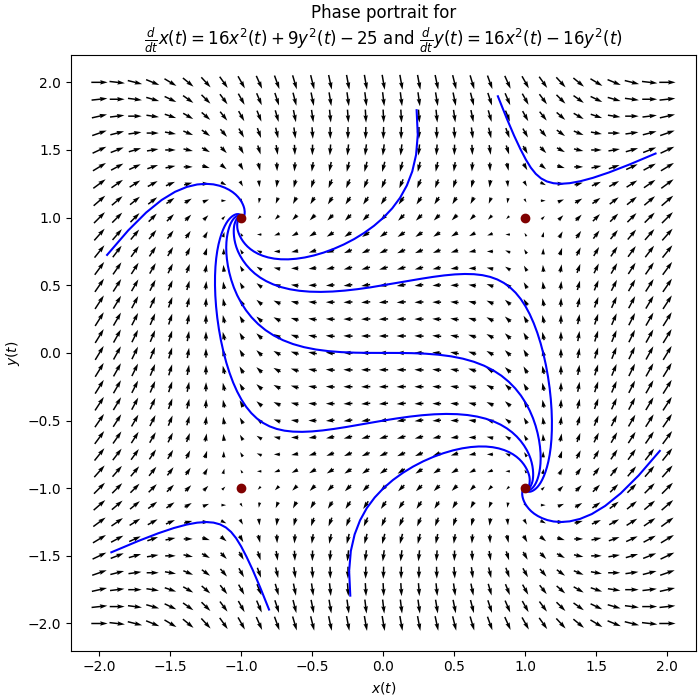

In [34]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
phase_portrait([P_eq, Q_eq], [x, y], parameters, axes, normalize=False, damping_factor=0.5)
for trajectory in trajectories:
    axes.plot(*trajectory, color='blue')
axes.scatter(*zip(*fixed_points), color='maroon', zorder=10)
_=axes.set(title=f'Phase portrait for\n${sp.latex(P_eq)}$ and ${sp.latex(Q_eq)}$')

# Lorenz's Butterfly

In this section we plot Lorenz's system of ODEs:

$$ \dot{x} = \sigma(y - x) $$

$$ \dot{y} = rx - y - xz $$

$$ \dot{z} = xy - bz $$

In [35]:
t, sigma, r, b = sp.symbols('t sigma r b')
x = sp.Function('x')(t)
y = sp.Function('y')(t)
z = sp.Function('z')(t)
z

z(t)

In [36]:
x_eq = sp.Eq(x.diff(t), sigma * (y - x))
x_eq

Eq(Derivative(x(t), t), sigma*(-x(t) + y(t)))

In [37]:
y_eq = sp.Eq(y.diff(t), r*x - y - x*z)
y_eq

Eq(Derivative(y(t), t), r*x(t) - x(t)*z(t) - y(t))

In [38]:
z_eq = sp.Eq(z.diff(t), x*y - b*z)
z_eq

Eq(Derivative(z(t), t), -b*z(t) + x(t)*y(t))

In [39]:
fixed_points = sp.solve([x_eq.rhs, y_eq.rhs, z_eq.rhs], [x, y, z])
fixed_points

[(0, 0, 0),
 (-sqrt(b*r - b), -sqrt(b*(r - 1)), r - 1),
 (sqrt(b*r - b), sqrt(b*(r - 1)), r - 1)]

Let's substitute for $\sigma, r, b$

In [40]:
sigma_val, r_val, b_val = 10, 28, sp.Rational(8, 3)
x_eq = x_eq.subs(sigma, sigma_val)
y_eq = y_eq.subs(r, r_val)
z_eq = z_eq.subs(b, b_val)
fixed_points = sp.solve([x_eq.rhs, y_eq.rhs, z_eq.rhs], [x, y, z])
fixed_points

[(0, 0, 0), (-6*sqrt(2), -6*sqrt(2), 27), (6*sqrt(2), 6*sqrt(2), 27)]

In [41]:
t_a, t_b = 0, 30
quality = 4000
init_x = [0.1]
init_y = [0.1]
init_z = [0.1]
trajectories = calculate_numerically_list_of_trajectories(
    [x_eq.rhs, y_eq.rhs, z_eq.rhs], [x, y, z], t, (t_a, t_b), 0, 
    [(None, None) for _ in [x, y, z]], zip(init_x, init_y, init_z), 
    quality, with_t_array=True
)

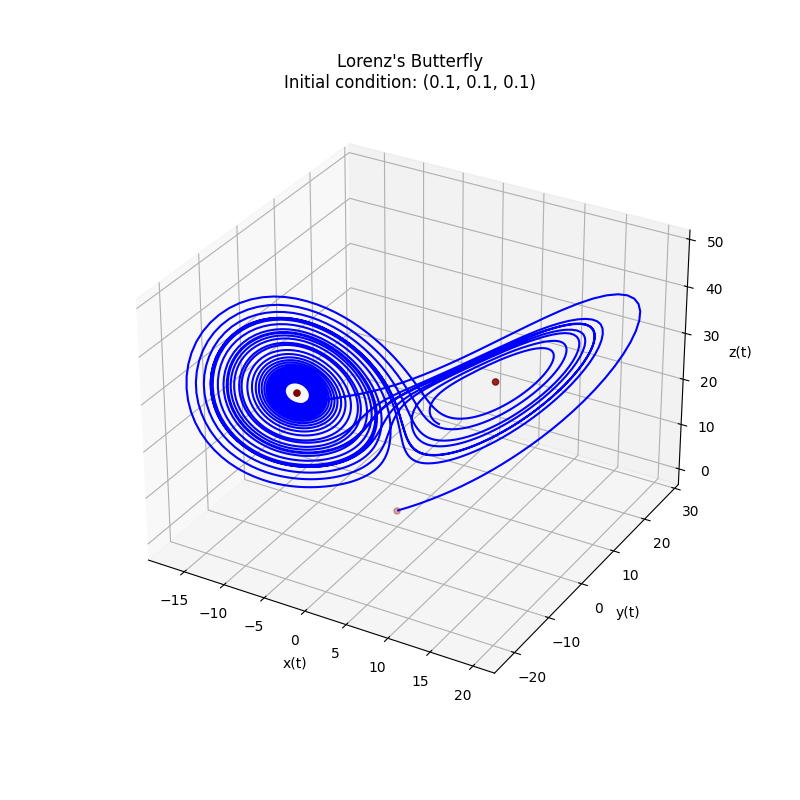

In [22]:
%matplotlib widget
figure = plt.figure()
axes = figure.add_subplot(111, projection='3d')
for t_range, *trajectory in trajectories:
    # plot_colored_line3d(*trajectory, t_range, axes, colormap_type='brg') #very slow
    axes.plot(*trajectory, color='blue')
axes.scatter(*zip(*fixed_points), color='maroon')
figure.set_size_inches(8, 8)
_=axes.set(title=f'Lorenz\'s Butterfly\nInitial condition: {list(zip(init_x, init_y, init_z))[0]}',
           xlabel=f'{x}', ylabel=f'{y}', zlabel=f'{z}')